<h1 align="center"> <span style="font-size: 20px;"> Proyecto Final Grupo Nº 7 </span> <br>
    <align="center"> <span style="font-size: 15px;">  Proyecto Yelp & Google Maps - Reviewa y Recomendaciones</span><br>         
<align="center"> <span style="font-size: 15px;">@utores:  Javier Castro, Luca Ramallo, Luis Ramírez, Lesmen García.</span> <br>
  <a href="https://github.com/lesmengp/Proyecto-Final-Grupo-07.git">GitHub: <span style="font-size: 20px;">Proyecto Yelp & Google Maps</span></a> 
</h1>

# Modelo de ML con Regresión Logística.

### Target = Promedios de Estrellas

### Librerías a Utilizar:

### Cargando Dataset Consolidado Final para ML: 'df_ML_promedios_Final.parquet'

In [82]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io
import json
import gcsfs
import scipy.optimize as opt
from sklearn import preprocessing### Seleccionando Variables

### Cargando DataSets Consolidado para Análisis de ML: 'df_business_yelp_ML.parquet'
# Ruta completa en Cloud Storage
ruta_eda_datalike = "gs://gmy/Datasets_ML/df_ML_promedios_Final.parquet"
# Lee el archivo Parquet directamente en un DataFrame de pandas
df_ML_promedios_Final = pd.read_parquet(ruta_eda_datalike, storage_options={"project": "Proyecto Final - Henry"})


# Variables Númericas
columnas_numericas = ['stars', 'review_count', 
        'RestaurantsTakeOut', 'BusinessAcceptsCreditCards',
        'RestaurantsDelivery', 'OutdoorSeating', 'BikeParking',
        'RestaurantsReservations', 'WiFi', 'HasTV', 
        'promedio_sentimientos_positivos', 
        'promedio_sentimientos_negativos',
        'Promedio_useful', 'Promedio_funny', 'Promedio_cool',
        'promedio_sentimientos_positivosTip',
        'promedio_sentimientos_negativosTip', 
        'promedio_compliment_count_Tip',
        'A_M_Monday', 'A_T_Monday', 'A_N_Monday', 
        'A_M_Tuesday', 'A_T_Tuesday', 'A_N_Tuesday',
        'A_M_Wednesday', 'A_T_Wednesday', 'A_N_Wednesday',
        'A_M_Thursday', 'A_T_Thursday', 'A_N_Thursday',
        'A_M_Friday', 'A_T_Friday', 'A_N_Friday',
        'A_M_Saturday', 'A_T_Saturday', 'A_N_Saturday',
        'A_M_Sunday', 'A_T_Sunday', 'A_N_Sunday']

df_ml = df_ML_promedios_Final[columnas_numericas]

### Normalizando Columna de estrellas 'stars'
# Crea una nueva columna 'binario' con valores 1 si 'valor' es mayor o igual a 4, de lo contrario, 0
df_ml['stars_Target'] = df_ml['stars'].apply(lambda x: 1 if x >= 4 else 0)

ColumnasModelo_ML = ['review_count', 'RestaurantsTakeOut',
       'BusinessAcceptsCreditCards', 'RestaurantsDelivery', 'OutdoorSeating',
       'BikeParking', 'RestaurantsReservations', 'WiFi', 'HasTV',
       'promedio_sentimientos_positivos', 'promedio_sentimientos_negativos',
       'Promedio_useful', 'Promedio_funny', 'Promedio_cool',
       'promedio_sentimientos_positivosTip',
       'promedio_sentimientos_negativosTip', 'promedio_compliment_count_Tip',
       'A_M_Monday', 'A_T_Monday', 'A_N_Monday', 'A_M_Tuesday', 'A_T_Tuesday',
       'A_N_Tuesday', 'A_M_Wednesday', 'A_T_Wednesday', 'A_N_Wednesday',
       'A_M_Thursday', 'A_T_Thursday', 'A_N_Thursday', 'A_M_Friday',
       'A_T_Friday', 'A_N_Friday', 'A_M_Saturday', 'A_T_Saturday',
       'A_N_Saturday', 'A_M_Sunday', 'A_T_Sunday', 'A_N_Sunday',
        ]

### Defenimos las variables 'X' nuestro modelo
X = np.asarray(df_ml[ColumnasModelo_ML])
y = np.asarray(df_ml['stars_Target'])


### Normalizando el Dataset del Modelo de ML
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)


## Train/Test dataset
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)


### Modeling (Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Crear un modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

### Predecir en el Nuevos Datos
### Cargando los Datos

nuevos_datos = pd.DataFrame({
    'review_count': [18], 
    'RestaurantsTakeOut': [0],
    'BusinessAcceptsCreditCards': [0], 
    'RestaurantsDelivery': [0], 
    'OutdoorSeating': [0],
    'BikeParking': [0], 
    'RestaurantsReservations': [0], 
    'WiFi': [0], 
    'HasTV': [0],
    'promedio_sentimientos_positivos': [1], 
    'promedio_sentimientos_negativos': [1],
    'Promedio_useful': [1.4], 
    'Promedio_funny': [0.876], 
    'Promedio_cool': [0.77754],
    'promedio_sentimientos_positivosTip': [1],
    'promedio_sentimientos_negativosTip': [1], 
    'promedio_compliment_count_Tip': [0],
    'A_M_Monday': [1], 
    'A_T_Monday': [0], 
    'A_N_Monday': [0], 
    'A_M_Tuesday': [1], 
    'A_T_Tuesday': [0],
    'A_N_Tuesday': [0], 
    'A_M_Wednesday': [0], 
    'A_T_Wednesday': [0], 
    'A_N_Wednesday': [1],
    'A_M_Thursday': [1], 
    'A_T_Thursday': [1], 
    'A_N_Thursday': [1], 
    'A_M_Friday': [1],
    'A_T_Friday': [0], 
    'A_N_Friday': [0], 
    'A_M_Saturday': [0], 
    'A_T_Saturday': [1],
    'A_N_Saturday': [0], 
    'A_M_Sunday': [0], 
    'A_T_Sunday': [1], 
    'A_N_Sunday': [0],
})


# Realizar la predicción en los datos editados
prediccion_datos_nuevos = model.predict(nuevos_datos)
print("Predicción Nuevos Datos = ", prediccion_datos_nuevos)


/var/tmp/ipykernel_103703/710722128.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ml['stars_Target'] = df_ml['stars'].apply(lambda x: 1 if x >= 4 else 0)


Predicción Nuevos Datos =  [1]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [78]:
df_ML_promedios_Final.head(1).T

,0
business_id,MTSW4McQd7CbVtyjqoe9mw
name,St Honore Pastries
address,935 Race St
city,Philadelphia
state,CA
...,...
A_N_Saturday,0
A_M_Sunday,1
A_T_Sunday,0
A_N_Sunday,0


### Evaluación del Modelo

### jaccard index

Let's try the jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of the two label sets. If the entire set of predicted labels for a sample strictly matches with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [65]:
from sklearn.metrics import jaccard_score

jaccard_score(y_test, y_pred, pos_label=0)

0.7450912250217202

In [66]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)

print("Precisión del modelo de regresión logística:", accuracy)

Precisión del modelo de regresión logística: 0.8513225904530253


### confusion matrix

Another way of looking at the accuracy of the classifier is to look at **confusion matrix**.

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[4112  576]
 [ 891 4288]]


Confusion matrix, without normalization
[[4112  576]
 [ 891 4288]]


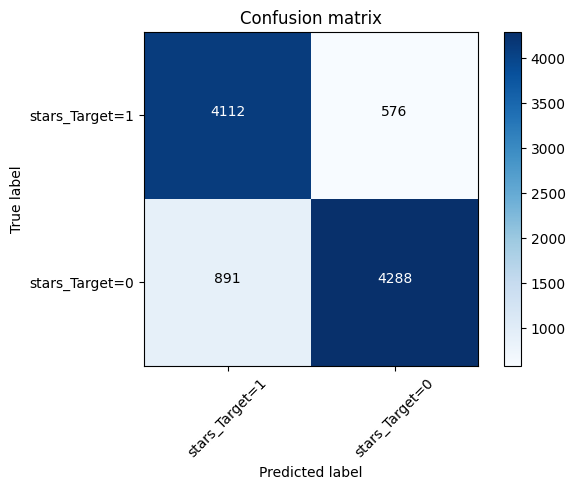

In [67]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['stars_Target=1','stars_Target=0'],normalize= False,  title='Confusion matrix')

In [68]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      5179
           1       0.82      0.88      0.85      4688

    accuracy                           0.85      9867
   macro avg       0.85      0.85      0.85      9867
weighted avg       0.85      0.85      0.85      9867



In [69]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Obtener los valores individuales de la matriz de confusión
TP = conf_matrix[1, 1]  # Verdaderos positivos
TN = conf_matrix[0, 0]  # Verdaderos negativos
FP = conf_matrix[0, 1]  # Falsos positivos
FN = conf_matrix[1, 0]  # Falsos negativos

print("Número de casos que se clasificaron correctamente como positivos = ", TP)
print("Número de casos que se clasificaron correctamente como negativos = ", TN)
print("Número de casos que se clasificaron incorrectamente como positivos\n   cuando en realidad son negativos = ", FP)
print("Número de casos que se clasificaron incorrectamente como negativos\n   cuando en realidad son positivos = ", FN)

Número de casos que se clasificaron correctamente como positivos =  4112
Número de casos que se clasificaron correctamente como negativos =  4288
Número de casos que se clasificaron incorrectamente como positivos
   cuando en realidad son negativos =  891
Número de casos que se clasificaron incorrectamente como negativos
   cuando en realidad son positivos =  576


In [33]:
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)

0.3504278482797817

### Fin